In [7]:
from skimage.metrics import structural_similarity as SSIM
from skimage.metrics import peak_signal_noise_ratio as PSNR
from skimage.metrics import mean_squared_error as MSE
from skimage.metrics import normalized_mutual_information as NMI
from units.prep import normalize

In [10]:
def calc_metric(real,fak):
    d={"MSE":MSE(real,fak),"SSIM":SSIM(real,fak),"PSNR":PSNR(real,fak),"NMI":NMI(real,fak)}
    return d

In [ ]:
import os,numpy as np
from units.base import visualize
from pet_cycgan.model import Generator

NEWPATH="datasets/brainmap/npdata"
data=[f"{NEWPATH}/{img}"for img in os.listdir(NEWPATH)]
demo=np.load(data[0])
t1,fa=demo['T1'],demo["FA"]
G=Generator((128,128,128,1))
G.load_weights("pet_cycgan/G1.h5")
# G.save_weights("pet_cycgan/G1_weights.h5")
def cm(G,inp,tru):
    tms=np.zeros((192,224,192))
    fake=np.zeros((192,224,192))
    p={"MSE":[0,0],"SSIM":[0,0],"PSNR":[0,0],"NMI":[0,0]}
    for x in range(2):
        sx=slice(x*(192-128),x*(192-128)+128)
        for y in range(2):
            sy=slice(y*(224-128),y*(224-128)+128)
            for z in range(2):
                sz=slice(z*(192-128),z*(192-128)+128)
                nf=G(inp[np.newaxis,sx,sy,sz,np.newaxis])[0,...,0].numpy()
                nf=normalize(nf)
                d=calc_metric(tru[sx,sy,sz],nf)
                for x,y in d.items():
                    p[x][0]+=y
                    p[x][1]+=1
    return p
# visualize([t1,fake,fa])
p=cm(G,t1,fa)

In [20]:
t1.shape
NMI(t1,fa)

1.187268158610341

In [ ]:
print("Norm",{x:y[0]/y[1] for x,y in p.items()})

Norm {'MSE': 0.018339278086454403, 'SSIM': 0.6535132372330583, 'PSNR': 17.455170338668328, 'NMI': 1.1390803278458006}


In [ ]:
print("Unnorm",{x:y[0]/y[1] for x,y in p.items()})

{'MSE': 0.02059108091868192, 'SSIM': 0.6470906247687488, 'PSNR': 16.951902336738435}


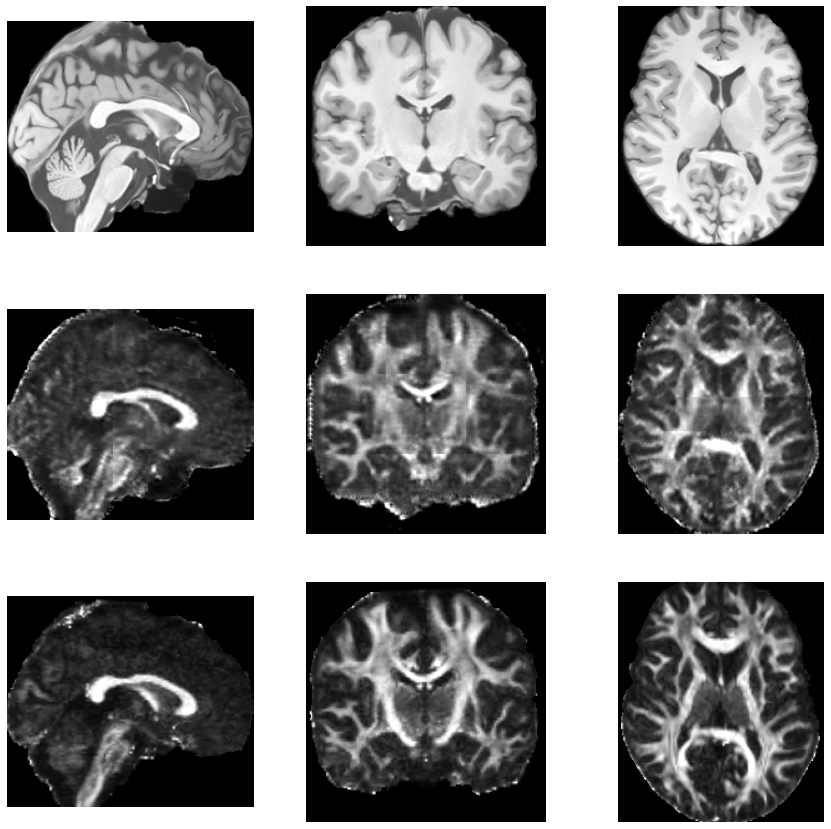

In [ ]:
from units.prep import normalize
visualize([t1,normalize(fake),fa])